In [3]:
# P mod 8
7 % 8

7

In [1]:
import nltk
from nltk.probability import FreqDist
from nltk.book import text7
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


___
# Task 1

In [2]:
fdist = FreqDist(text7)
hapaxes = fdist.hapaxes()
less_than_5_occurrences = [word for word, freq in fdist.items() if freq < 5]

print("Hapaxes (Unique Words):", hapaxes)
print("\nWords occurring less than 5 times:", less_than_5_occurrences)

Hapaxes (Unique Words): ['Pierre', 'Elsevier', 'Agnew', 'fiber', 'resilient', 'lungs', 'symptoms', 'Loews', 'Micronite', 'spokewoman', 'properties', 'Dana-Farber', 'filter', '1953', '1955', 'Four', 'diagnosed', 'malignant', 'mesothelioma', 'asbestosis', 'morbidity', 'Groton', 'stringently', 'smooth', 'needle-like', 'classified', 'amphobiles', 'Brooke', 'pathlogy', 'Vermont', 'curly', 'Environmental', 'Protection', 'gradual', '1997', 'cancer-causing', 'outlawed', '160', 'Areas', 'dusty', 'burlap', 'sacks', 'bin', 'poured', 'cotton', 'acetate', 'mechanically', 'clouds', 'dust', 'hung', 'ventilated', 'Darrell', 'Yields', 'tracked', 'IBC', 'fraction', 'Compound', 'reinvestment', 'lengthened', 'longest', 'Donoghue', 'Longer', 'Shorter', 'Brenda', 'Malizia', 'Negus', 'rises', 'pour', 'Assets', '352.7', 'money-fund', 'Dreyfus', 'World-Wide', 'top-yielding', '9.37', '9.45', 'invests', 'waiving', '8.12', '8.14', '8.19', '8.22', '8.53', '8.56', 'J.P.', 'Bolduc', '83.4', 'energy-services', 'Terre

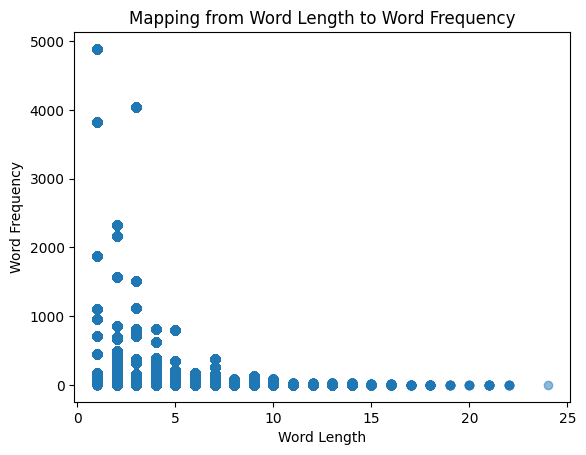

In [3]:
word_lengths = [len(word) for word in text7]
plt.scatter(word_lengths, [fdist[word] for word in text7], alpha=0.5)
plt.title('Mapping from Word Length to Word Frequency')
plt.xlabel('Word Length')
plt.ylabel('Word Frequency')
plt.show()

In [4]:
sentences = nltk.sent_tokenize(" ".join(text7))
end_of_sentence_words = []

for sentence in sentences:
    tokens = word_tokenize(sentence)
    # Filter out punctuation and non-alphabetic words
    words = [word.lower() for word in tokens if word.isalpha()]
    if words:
        last_word = words[-1]
        if last_word.isalpha() and len(last_word) >= 2:  # Check if the last word is alphabetic and at least 2 letters long
            end_of_sentence_words.append(last_word)

end_of_sentence_fdist = FreqDist(end_of_sentence_words)
most_frequent_end_of_sentence_words = end_of_sentence_fdist.most_common(10)

print("10 Most Frequent Words at the End of Sentences:", most_frequent_end_of_sentence_words)

10 Most Frequent Words at the End of Sentences: [('year', 39), ('to', 39), ('in', 34), ('share', 34), ('trading', 30), ('it', 26), ('market', 23), ('years', 22), ('company', 22), ('the', 20)]


___
# Task 2

In [5]:
from nltk.text import Text

In [6]:
with open('cosmos.txt', 'r') as f:
    raw = f.read()

tokens = word_tokenize(raw)
text = Text(tokens)


In [7]:
text.concordance('question')


Displaying 25 of 33 matches:
 Analytic Theory of Heat ) , and A Question Put to Pythagoras by Anaximenes ( 
nts of the universe bearing on the question of its ultimate fate have been sug
ance against malaria . There is no question that it is better to be anemic tha
o show that life is not out of the question in such a very different planet , 
, incidentally , one answer to the question of what evolution was doing betwee
to abandon a circular orbit and to question his faith in the Divine Geometer .
 There is no general answer to the question of which processes dominate , the 
rtainly true . The only unresolved question was which side of the telescope th
such an environment ? To test this question , many years ago my colleagues and
eriments asked a different kind of question , but in all cases a question abou
d of question , but in all cases a question about Martian metabolism . If ther
 the Earth that even phrasing this question chills me . If mere is life on Mar
ly to determine the ans

In [38]:
text.concordance('Theory')


Displaying 21 of 21 matches:
 quote by Joseph Fourier ( Analytic Theory of Heat ) , and A Question Put to P
world . Evolution is a fact , not a theory . That the mechanism of evolution i
ail . There is as yet no predictive theory of biology , just as there is not y
st as there is not yet a predictive theory of history . The reasons are the sa
 . The elegance and grandeur of the theory , however , persuaded him that the 
 of modern science—the offspring of theory and observation—teetered on the pre
t and laying the foundation for the theory of universal gravitation . The only
 †Isaac Newton had written “ If the Theory of making Telescopes could at lengt
e microscope and Huygens ’ own wave theory of light . * These were all connect
e also the grandfathers of the germ theory of disease , and therefore of much 
 study of the game of dice , to the theory of probability . He improved the ai
are naturally explained by the wave theory , and in subsequent years Huygens ’
, Einstein showed that 

In [8]:
text.similar('theory')

way universe world life planet matter war sun scale law method science
millions account years history grace moment stars work


In [9]:
text.similar('cells')

stars cosmos one s way universe world man viewed made state earth
books question publisher time planet epoch other author


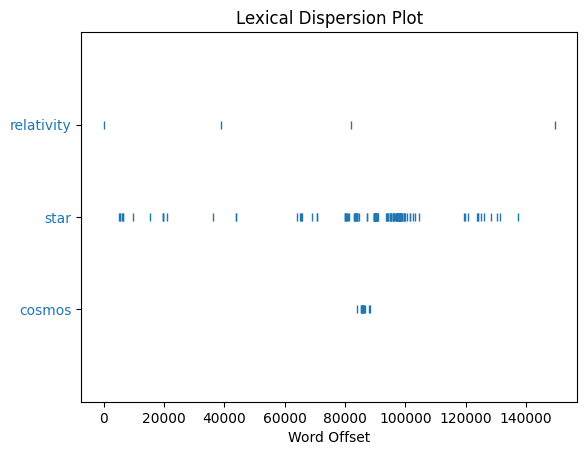

In [10]:
text.dispersion_plot(['cosmos', 'star', 'relativity'])

In [11]:
fdist = nltk.FreqDist(tokens)
print("\nMost common words and their frequencies:")
print(fdist.most_common(5))


Most common words and their frequencies:
[('the', 8796), (',', 8691), ('.', 6567), ('of', 5526), ('and', 3323)]


___
# Task 3

In [12]:
import re

In [24]:
def extract_monetary_amounts(text):
    pattern = r'\$\s?\d+(?:,\d{3})*(?:\.\d{2})?'
    matches = re.findall(pattern, text)
    
    # Convert matches to float numbers
    amounts = [float(match.replace('$', '').replace(',', '')) for match in matches]
    
    return amounts

def sum_monetary_amounts(text):
    amounts = extract_monetary_amounts(text)
    total_sum = sum(amounts)
    return total_sum

In [25]:
with open('cosmos.txt', 'r') as f:
    raw = f.read()

In [26]:
result = sum_monetary_amounts(raw)

print("Monetary Amounts:", extract_monetary_amounts(raw))
print("Total Sum:", result)

Monetary Amounts: [12000.0, 300.0, 20.0, 5.0, 3.0, 7.0]
Total Sum: 12335.0


___
# Task 4

In [16]:
import json

In [17]:
def process_json(json_data):
    # Remove entries from "Nodes" that begin with "8."
    json_data["Config"]["Nodes"] = [node for node in json_data["Config"]["Nodes"] if not node.startswith("8.")]

    # Replace "Server" entries
    for i, server_entry in enumerate(json_data["Config"]["Server"]):
        match = re.match(r'^(?P<name>\w+)\.(?P<type>\w+)$', server_entry)
        if match:
            json_data["Config"]["Server"][i] = {"name": match.group('name'), "type": match.group('type')}

    return json_data

In [18]:
json_str = '''
{
  "HTTPHost": "localhost",
  "HTTPPort": 8545,
  "Config": {
    "Enabled": true,
    "Server": ["wakuv2.prod"],
    "Nodes": ["8.210.222.231", "168.166.125.145"]
  }
}
'''

# Load JSON string into a Python object
original_json = json.loads(json_str)

# Process the JSON data
processed_json = process_json(original_json)

# Convert the processed JSON back to a string for printing
processed_json_str = json.dumps(processed_json, indent=2)
print(processed_json_str)


{
  "HTTPHost": "localhost",
  "HTTPPort": 8545,
  "Config": {
    "Enabled": true,
    "Server": [
      {
        "name": "wakuv2",
        "type": "prod"
      }
    ],
    "Nodes": [
      "168.166.125.145"
    ]
  }
}
